In [1]:
class Node(object):
    
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
        
    def __repr__(self):
        isleaf = self.left is None and self.right is None
        s = repr(self.point)
        if not isleaf:
            s = "[" + s + ":"
        if self.left is not None:
            s += "\n  left = " + "\n  ".join(repr(self.left).split('\n'))
        if self.right is not None:
            s += "\n  right = " + "\n  ".join(repr(self.right).split('\n'))
        if not isleaf:
            s += "\n  ]"
        return s

def kdtree(points, depth=0):
    if len(points) == 0:
        return None
    k = len(points[0])
    a = depth % k
    points = sorted(points, key=lambda x: x[a])
    i = int(len(points) / 2)  # middle index, rounded down
    node_left = kdtree(points[:i], depth + 1)
    node_right = kdtree(points[i+1:], depth + 1)
    node = Node(points[i], node_left, node_right)
    return node

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
points = list(set([(int(x), int(y)) for x, y in np.random.randint(1, 6, size=(60, 2))]))[::3][:6]
print(points)
kdtree(points)

[(1, 3), (5, 1), (5, 5), (2, 2), (1, 1), (1, 4)]


[(2, 2):
  left = [(1, 3):
    left = (1, 1)
    right = (1, 4)
    ]
  right = [(5, 5):
    left = (5, 1)
    ]
  ]

In [4]:
points = [(1, 2), (3, 2), (5, 5), (2, 1), (4, 3), (1, 5)]
root = kdtree(points)
print(root)

[(3, 2):
  left = [(1, 2):
    left = (2, 1)
    right = (1, 5)
    ]
  right = [(5, 5):
    left = (4, 3)
    ]
  ]


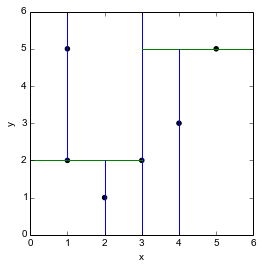

In [5]:
def partition_plot(node, xlower=0, xupper=6, ylower=0, yupper=6, depth=0):
    x, y = node.point
    if depth % 2 == 0:
        plt.plot([x, x], [ylower, yupper], c='b')
    else:
        plt.plot([xlower, xupper], [y, y], c='g')
    if node.left is not None:
        if depth % 2 == 0:
            partition_plot(node.left, xlower, x, ylower, yupper, depth+1)
        else:
            partition_plot(node.left, xlower, xupper, ylower, y, depth+1)
    if node.right is not None:
        if depth % 2 == 0:
            partition_plot(node.right, x, xupper, ylower, yupper, depth+1)
        else:
            partition_plot(node.right, xlower, xupper, y, yupper, depth+1)
partition_plot(root)
plt.scatter([x[0] for x in points], [x[1] for x in points], c='k')
plt.axis([0, 6, 0, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.savefig("kdtree.svg")
plt.show()

In [6]:
from scipy.spatial import KDTree
tree = KDTree(points)

In [7]:
tree.data

array([[1, 2],
       [3, 2],
       [5, 5],
       [2, 1],
       [4, 3],
       [1, 5]])

In [8]:
dist, idx = tree.query([(4.5, 1.25)])

In [9]:
dist

array([ 1.67705098])

In [10]:
idx

array([1])

In [11]:
tree.data[idx]

array([[3, 2]])

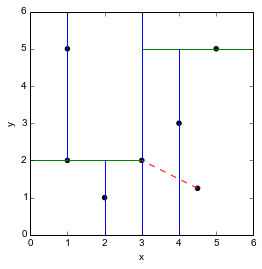

In [12]:
partition_plot(root)
plt.scatter([x[0] for x in points] + [4.5], [x[1] for x in points] + [1.25], c='k')
plt.plot([4.5, 3], [1.25, 2], 'r--')
plt.axis([0, 6, 0, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.savefig("kdtree-query.svg")
plt.show()